### Exploratory Data Analysis and Data Processing

In [2]:
import os
for dirname, _, filenames in os.walk("G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\2021.wanlp-1.51.pdf
G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\C14-1022.pdf
G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\corpus.pkl
G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\dictionary.gensim
G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\LSTM, CNN with Tensorflow + LDA (topic modelling) UPDATED.ipynb
G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\LSTM, CNN with Tensorflow + LDA (topic modelling).ipynb
G:\SECON

In [6]:
import tensorflow as tf
import pandas as pd
import json
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
#from spacy import en_core_web_sm             
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer


#import numpy as np 
#import pandas as pd 
#import os
#import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
#import re
#import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
#import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

print(tf.__version__)  # 2.0.0-beta0

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\711994\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2.11.0


#### Text Classification: Using Transformers Encoder Block
A transformer is a deep learning model that adopts the mechanism of self-attention, differentially weighting the significance of each part of the input data
They hold the potential to understand the relationshipbetween sequential elements that are far from each other
They are way more accurate
They pay equal attention to all the elements in the sequence


In [7]:
data1 = pd.read_json("G:\\SECOND SEMESTER\\I CAN PLUS TO GOD BE ALL GLORY\\APPLIED ARTFICIAL INTELLIGENCE\\GRADED FOLDER\\SARCASM DETECTION IN SENTIMENT ANALYSIS\\Sarcasm_Headlines_Dataset.json\\Sarcasm_Headlines_Dataset.json", lines=True)
data2 = pd.read_json("G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\Sarcasm_Headlines_Dataset_v2.json\Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [8]:
data1 = data1[['headline','is_sarcastic']]
data2 = data2[['headline','is_sarcastic']]

data = pd.concat([data1,data2])
data.reset_index(drop=True, inplace=True)

In [9]:
data

headline  is_sarcastic
0      former versace store clerk sues over secret 'b...             0
1      the 'roseanne' revival catches up to our thorn...             0
2      mom starting to fear son's web series closest ...             1
3      boehner just wants wife to listen, not come up...             1
4      j.k. rowling wishes snape happy birthday in th...             0
...                                                  ...           ...
55323       jews to celebrate rosh hashasha or something             1
55324  internal affairs investigator disappointed con...             1
55325  the most beautiful acceptance speech this week...             0
55326  mars probe destroyed by orbiting spielberg-gat...             1
55327                 dad clarifies this not a food stop             1

[55328 rows x 2 columns]

### EDA and Text Preprocessing

#### Checking for Missing Values

In [10]:
data.isnull().sum()


headline        0
is_sarcastic    0
dtype: int64

#### Finding the Classes Balance/Imbalance


In [11]:
px.bar(data.groupby('is_sarcastic').count().reset_index(), x='headline',title='Count of Sarcastic and Genuine Headlines')


#### Special Characters Removal


We will not remove numbers from the text data right away, lets further analyse if they contain any relevant information
We can find the entity type of the tokens in the sentences using Named Entity Recognition (NER), this will help us identify the type and relevance of numbers in our text data

In [12]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [13]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)

100%|███████████████████████████████████████████████████████████████████████████| 55328/55328 [03:42<00:00, 249.11it/s]


In [14]:
data['clean_headline'] = data['headline'].apply(text_cleaning)

In [15]:
data['sentence_length'] = data['clean_headline'].apply(lambda x: len(x.split()))
data

headline  is_sarcastic  \
0      former versace store clerk sues over secret 'b...             0   
1      the 'roseanne' revival catches up to our thorn...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen, not come up...             1   
4      j.k. rowling wishes snape happy birthday in th...             0   
...                                                  ...           ...   
55323       jews to celebrate rosh hashasha or something             1   
55324  internal affairs investigator disappointed con...             1   
55325  the most beautiful acceptance speech this week...             0   
55326  mars probe destroyed by orbiting spielberg-gat...             1   
55327                 dad clarifies this not a food stop             1   

            entity                                     clean_headline  \
0                   former versace store clerk sue secret black co...   
1                   roseanne revival catch thorny political mood b...   
2                   mom start fear son web series closest thing gr...   
3                   boehner want wife listen not come alternative ...   
4           PERSON  j k rowling wish snape happy birthday magical way   
...            ...                                                ...   
55323  NORP,PERSON             jews celebrate rosh hashasha something   
55324               internal affairs investigator disappoint consp...   
55325    DATE,NORP  beautiful acceptance speech week come queer ko...   
55326               mar probe destroy orbit spielberg gate space p...   
55327                                       dad clarify not food stop   

       sentence_length  
0                   10  
1                    8  
2                    9  
3                   10  
4                    9  
...                ...  
55323                5  
55324                8  
55325                7  
55326                8  
55327                5  

[55328 rows x 5 columns]

#### Headlines Length Distribution
Look for outlier length of headline sentences
Usually the headlines shouldn't be more than 20-30 words

In [16]:
px.histogram(data, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")

In [17]:
data[data['sentence_length']==107]['headline']

34011    hot wheels ranked number one toy for rolling d...
Name: headline, dtype: object

In [18]:
data.drop(data[data['sentence_length'] == 107].index, inplace = True)
data.reset_index(inplace=True, drop=True)

#### Headlines Length Distribution: Outliers Removed
The headlines after the removal of outliers do not exceed the limit of 20-30 words
They are mostly centered in the range of 5-10 words


In [20]:
px.histogram(data, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")

#### Filtering: Find Sentences that Contain Numbers

In [21]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
data

headline  is_sarcastic  \
0      former versace store clerk sues over secret 'b...             0   
1      the 'roseanne' revival catches up to our thorn...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen, not come up...             1   
4      j.k. rowling wishes snape happy birthday in th...             0   
...                                                  ...           ...   
55322       jews to celebrate rosh hashasha or something             1   
55323  internal affairs investigator disappointed con...             1   
55324  the most beautiful acceptance speech this week...             0   
55325  mars probe destroyed by orbiting spielberg-gat...             1   
55326                 dad clarifies this not a food stop             1   

            entity                                     clean_headline  \
0                   former versace store clerk sue secret black co...   
1                   roseanne revival catch thorny political mood b...   
2                   mom start fear son web series closest thing gr...   
3                   boehner want wife listen not come alternative ...   
4           PERSON  j k rowling wish snape happy birthday magical way   
...            ...                                                ...   
55322  NORP,PERSON             jews celebrate rosh hashasha something   
55323               internal affairs investigator disappoint consp...   
55324    DATE,NORP  beautiful acceptance speech week come queer ko...   
55325               mar probe destroy orbit spielberg gate space p...   
55326                                       dad clarify not food stop   

       sentence_length  contains_number  
0                   10            False  
1                    8            False  
2                    9            False  
3                   10            False  
4                    9            False  
...                ...              ...  
55322                5            False  
55323                8            False  
55324                7            False  
55325                8            False  
55326                5            False  

[55327 rows x 6 columns]

#### Analysis of Samples Containing numbers of Time, Date or Cardinal Entity type
The numbers in a text data can have different implications
While the naive text preprocessing methods suggest that the numbers should be removed along with the special characters
The entity type of these numbers should be identified to get their exact implications

#### 10 Random Samples: Date Entity

In [22]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='DATE')].sample(10)


headline  is_sarcastic entity  \
3959        slain cop had only 37 years until retirement             1   DATE   
21686  mindfulness in your 20s: lessons i learned fro...             0   DATE   
41390       how i navigated my first 7 years of sobriety             0   DATE   
31761                      10 years of marriage equality             0   DATE   
8245               here are your 2017 emmy award winners             0   DATE   
47528                              40 years on the fence             0   DATE   
20925                  the best and worst movies of 2015             0   DATE   
21236                  hate trump? just wait until 2020.             0   DATE   
46721                     news roundup for july 19, 2017             0   DATE   
8663                               40 years on the fence             0   DATE   

                                 clean_headline  sentence_length  \
3959               slay cop 37 years retirement                5   
21686  mindfulness 20s lessons learn hitchhiker                5   
41390           navigate first 7 years sobriety                5   
31761                10 years marriage equality                4   
8245                    2017 emmy award winners                4   
47528                            40 years fence                3   
20925                    best worst movies 2015                4   
21236                      hate trump wait 2020                4   
46721                 news roundup july 19 2017                5   
8663                             40 years fence                3   

       contains_number  
3959              True  
21686             True  
41390             True  
31761             True  
8245              True  
47528             True  
20925             True  
21236             True  
46721             True  
8663              True

#### 10 Random Samples: Time Entity

In [23]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='TIME')].sample(10)


headline  is_sarcastic entity  \
44992                   5-minute hairstyles -- for real!             0   TIME   
25695                      oven preheated for 16 seconds             1   TIME   
38867                      oven preheated for 16 seconds             1   TIME   
49831           'vacation is when i have a 40-hour week'             0   TIME   
22033         the 1 minute blog. protesters and looting.             0   TIME   
18810                   5-minute hairstyles -- for real!             0   TIME   
40164  it's just 15 minutes to a grown-up, but not to...             0   TIME   
29670  how to be nicer, healthier and more focused in...             0   TIME   
45776         the 1 minute blog. protesters and looting.             0   TIME   
52545                    23-hour suicide watch a failure             1   TIME   

                         clean_headline  sentence_length  contains_number  
44992          5 minute hairstyles real                4             True  
25695            oven preheat 16 second                4             True  
38867            oven preheat 16 second                4             True  
49831             vacation 40 hour week                4             True  
22033     1 minute blog protesters loot                5             True  
18810          5 minute hairstyles real                4             True  
40164           15 minutes grow not kid                5             True  
29670  nicer healthier focus 15 minutes                5             True  
45776     1 minute blog protesters loot                5             True  
52545     23 hour suicide watch failure                5             True

##### 10 Random Samples: Cardinal Entity

In [24]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='CARDINAL')].sample(10)


headline  is_sarcastic  \
49511         6 treatable conditions that mimic dementia             0   
27864                  10 qualities of your inner spirit             0   
34063                6 essentials for a trash-free lunch             0   
42682  thoughts on 54 below, 'blood brothers' and cab...             0   
406                          6 tips to boost your career             0   
37352      kasich all but declares 2016 presidential run             0   
54348                     to read or not to read, part 2             0   
46115             4 resolutions every runner should make             0   
21289             8 famous women who popped the question             0   
14325              the 30 best workplaces to retire from             0   

         entity                        clean_headline  sentence_length  \
49511  CARDINAL  6 treatable condition mimic dementia                5   
27864  CARDINAL             10 qualities inner spirit                4   
34063  CARDINAL         6 essentials trash free lunch                5   
42682  CARDINAL    thoughts 54 blood brothers cabaret                5   
406    CARDINAL                    6 tip boost career                4   
37352  CARDINAL  kasich declare 2016 presidential run                5   
54348  CARDINAL                  read not read part 2                5   
46115  CARDINAL       4 resolutions every runner make                5   
21289  CARDINAL           8 famous women pop question                5   
14325  CARDINAL             30 best workplaces retire                4   

       contains_number  
49511             True  
27864             True  
34063             True  
42682             True  
406               True  
37352             True  
54348             True  
46115             True  
21289             True  
14325             True

Inference: A lot of these headlines wouldn't make sense without these time,date or even cardinal numbers. For now we can let them be a part of our clean text data, in the next version of this notebook we will try to figure out if we can replace these numbers with specific tokens so that the meaning of them is not completely lost by removing them. Also the vocabulary size can be reduced after this step.

##### Word Visualization: Word Clouds

In [25]:
sarcastic = data[data['is_sarcastic']==1]['clean_headline'].tolist()
genuine = data[data['is_sarcastic']==0]['clean_headline'].tolist()

### Top 50 Words: Sarcastic Headlines

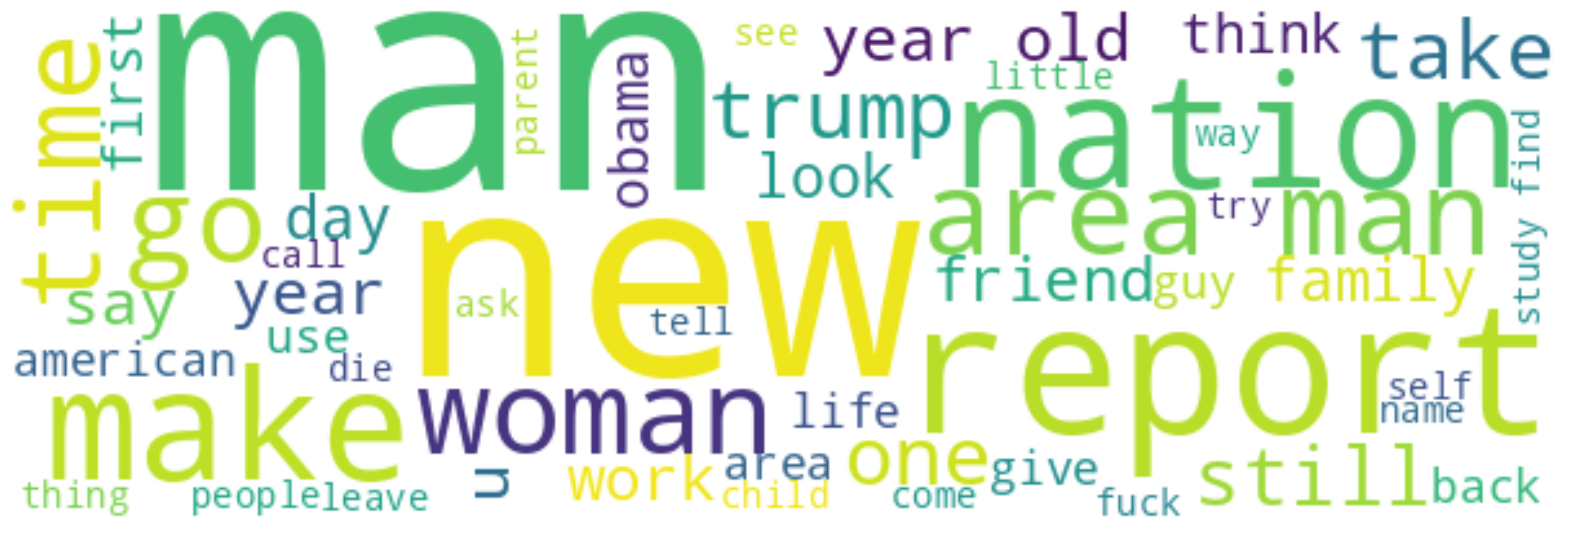

In [26]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Top 50 Words: Genuine Headlines


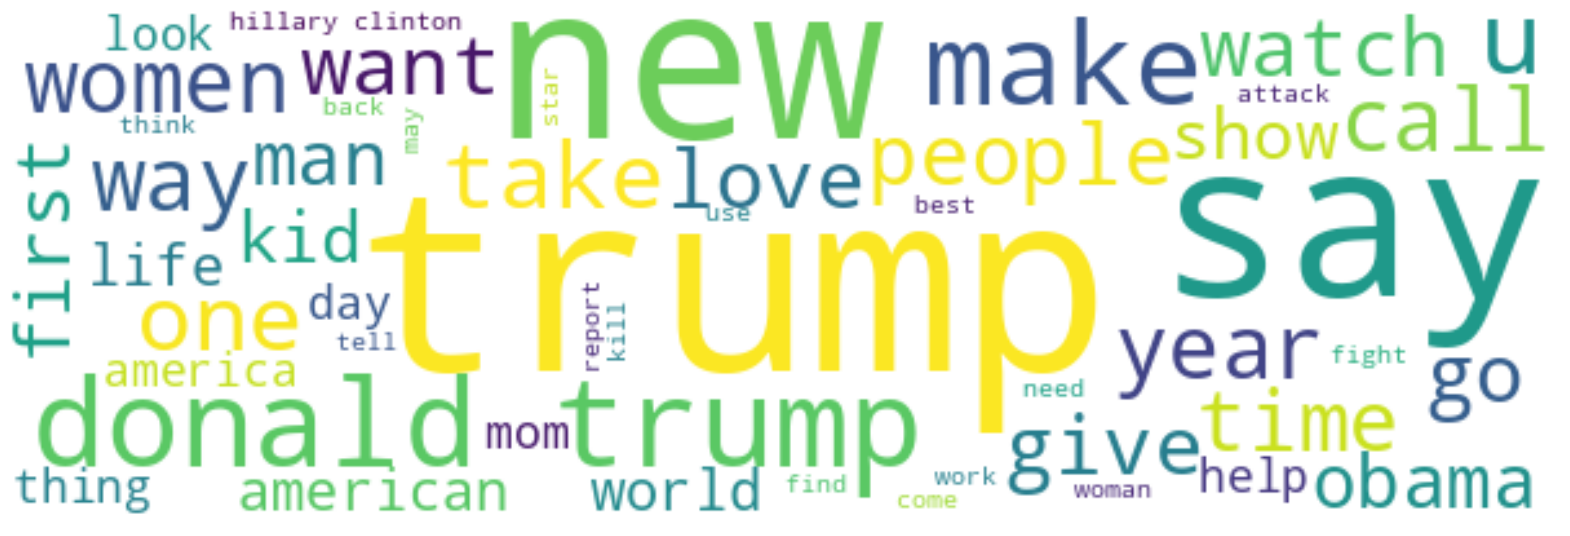

In [27]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### GO TO BOTTOM FOR MODEL

## EDA 2

In [3]:
# Run this code for the first time, to install the libraries and download wordnet
# %reset
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install pyLDAvis
# !{sys.executable} -m pip install gensim
# nltk.download('stopwords')
# nltk.download('wordnet')

In [4]:
df = pd.read_json("G:\SECOND SEMESTER\I CAN PLUS TO GOD BE ALL GLORY\APPLIED ARTFICIAL INTELLIGENCE\GRADED FOLDER\SARCASM DETECTION IN SENTIMENT ANALYSIS\Sarcasm_Headlines_Dataset.json\Sarcasm_Headlines_Dataset.json",lines=True )
df = df[['headline', 'is_sarcastic']]
df.head()

headline  is_sarcastic
0  former versace store clerk sues over secret 'b...             0
1  the 'roseanne' revival catches up to our thorn...             0
2  mom starting to fear son's web series closest ...             1
3  boehner just wants wife to listen, not come up...             1
4  j.k. rowling wishes snape happy birthday in th...             0

Exploratory Data Analysis
We would first like to understand the news headline dataset and identify the factors that causes a headline to be sarcastic news report. We would also like to identify if there is an imbalanced class, the frequencies and distribution of the different type of words. This will enable us to know if additional data processing steps are required (e.g. sampling of datapoints from sarcastic class if there is an imbalanced class in the dataset)

Data processing steps:

Check for missing values in headline, is_sarcastic
Convert all words into lowercase
Check for imbalanced classes in dataset
Removal of punctuation

In [5]:
# check for columns with null values
df.is_sarcastic.isnull().any() # no missing values in is_sarcastic column
df.headline.isnull().any() # no missing values in headline column

False

In [6]:
df['headline'] = df.headline.apply(lambda x:x.lower())  # convert all words in headline into lower case 
df['headline'] = df.headline.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))  # remove all punct

In [7]:
df['headline_count'] = df.headline.apply(lambda x: len(list(x.split())))
df['headline_unique_word_count'] = df.headline.apply(lambda x: len(set(x.split())))
df['headline_has_digits'] = df.headline.apply(lambda x: bool(re.search(r'\d', x)))
df

headline  is_sarcastic  \
0      former versace store clerk sues over secret bl...             0   
1      the roseanne revival catches up to our thorny ...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen not come up ...             1   
4      j.k rowling wishes snape happy birthday in the...             0   
...                                                  ...           ...   
26704               american politics in moral free-fall             0   
26705                            america's best 20 hikes             0   
26706                              reparations and obama             0   
26707  israeli ban targeting boycott supporters raise...             0   
26708                  gourmet gifts for the foodie 2014             0   

       headline_count  headline_unique_word_count  headline_has_digits  
0                  12                          12                False  
1                  14                          14                False  
2                  14                          13                False  
3                  13                          13                False  
4                  11                          11                False  
...               ...                         ...                  ...  
26704               5                           5                False  
26705               4                           4                 True  
26706               3                           3                False  
26707               8                           8                False  
26708               6                           6                 True  

[26709 rows x 5 columns]

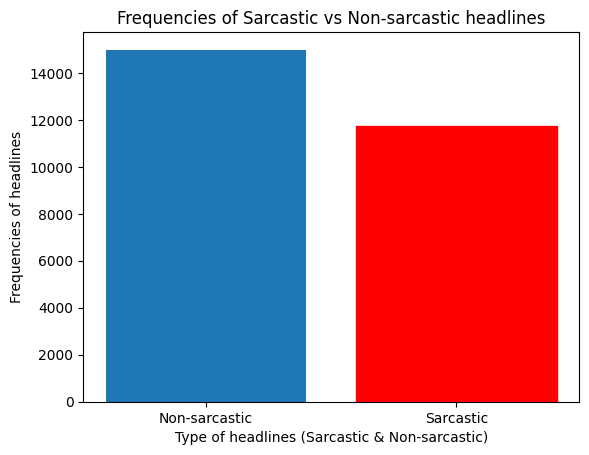

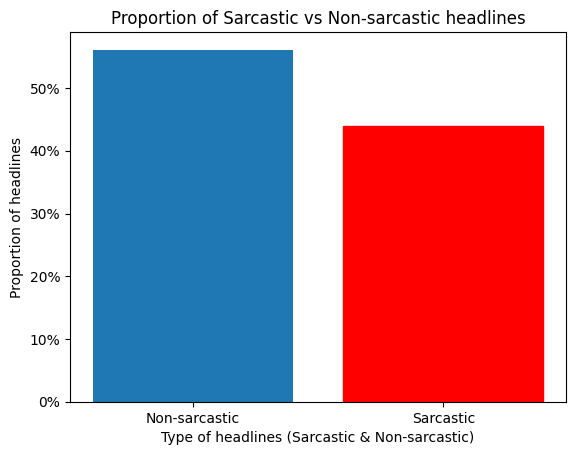

Non-sarcastic    0.56
Sarcastic        0.44
Name: headline_count, dtype: float64

In [8]:
sarcastic_dat = df.groupby('is_sarcastic').count()
sarcastic_dat.index = ['Non-sarcastic','Sarcastic']
plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Sarcastic vs Non-sarcastic headlines')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count)
bar_graph[1].set_color('r')
plt.show()


plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
plt.ylabel('Proportion of headlines')
plt.xticks(fontsize=10)
plt.title('Proportion of Sarcastic vs Non-sarcastic headlines')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# This is not an imbalanced class dataset
# Non-sarcastic    0.56
# Sarcastic        0.44
round(sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum(), 2)


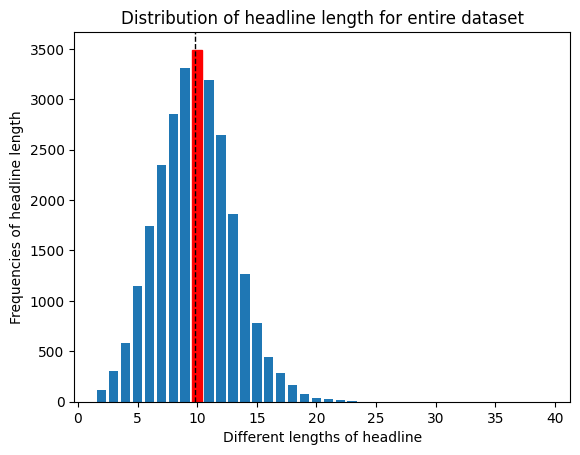

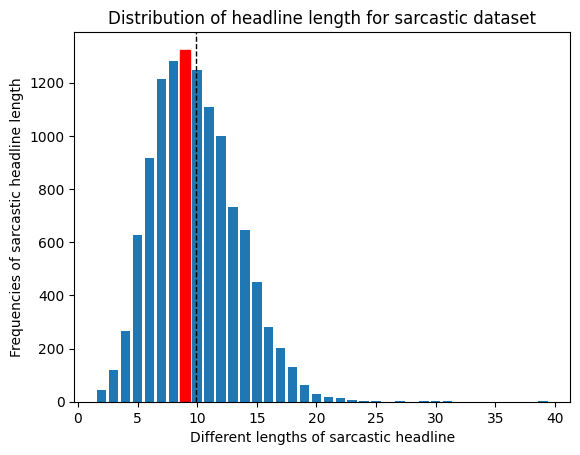

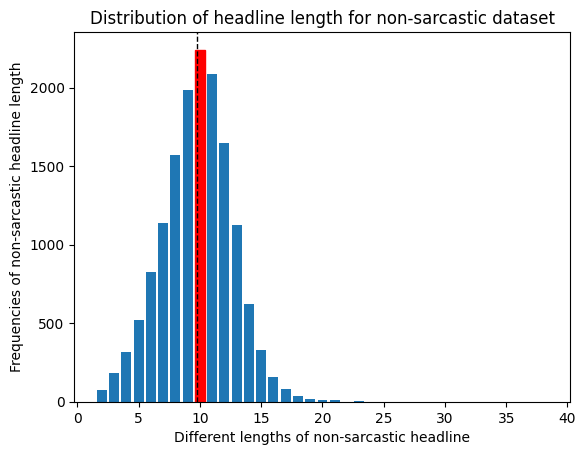

In [9]:
all_dat = df.groupby('headline_count').count()
sarcastic_dat1 = df[df.is_sarcastic==1]
sarcastic_dat = sarcastic_dat1.groupby('headline_count').count()
not_sarcastic_dat1 = df[df.is_sarcastic==0]
not_sarcastic_dat = not_sarcastic_dat1.groupby('headline_count').count()

plt.xlabel('Different lengths of headline')
plt.ylabel('Frequencies of headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for entire dataset')
bar_graph = plt.bar(all_dat.index, all_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(df.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()

plt.xlabel('Different lengths of sarcastic headline')
plt.ylabel('Frequencies of sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for sarcastic dataset')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline)
bar_graph[7].set_color('r')
plt.axvline(sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()


plt.xlabel('Different lengths of non-sarcastic headline')
plt.ylabel('Frequencies of non-sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for non-sarcastic dataset')
bar_graph = plt.bar(not_sarcastic_dat.index, not_sarcastic_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(not_sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()

# difference in the length of sarcastic and non-sarcastic headlines is not significant. 
# median and mean length of headlines is around 10 words

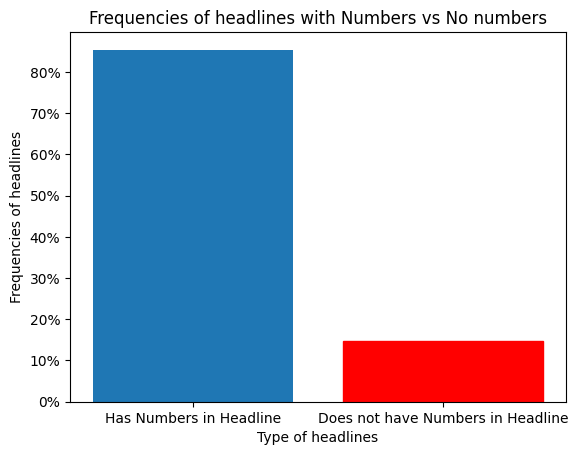

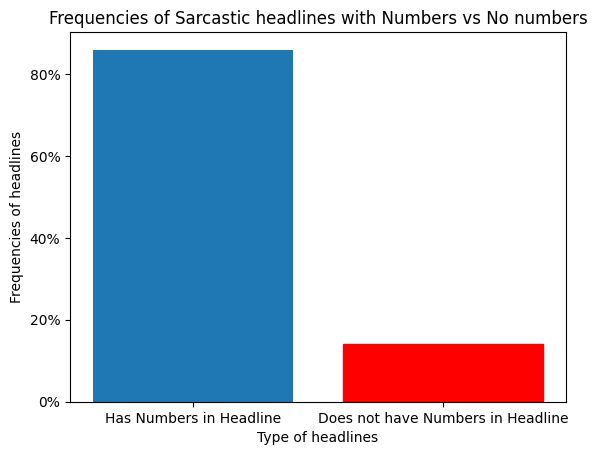

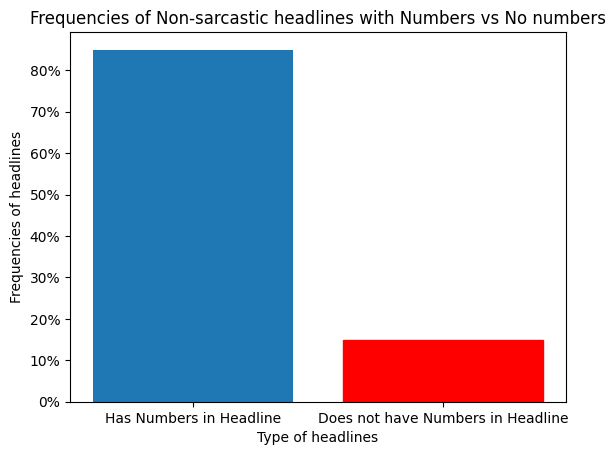

Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64
Has Numbers in Headline              0.86
Does not have Numbers in Headline    0.14
Name: headline, dtype: float64
Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64


In [10]:
digits_dat = df.groupby('headline_has_digits').count()
digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of headlines with Numbers vs No numbers')
bar_graph = plt.bar(digits_dat.index, digits_dat.headline / digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


sarcastic_digits_dat = df[df.is_sarcastic==1].groupby('headline_has_digits').count()
sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(sarcastic_digits_dat.index, sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


not_sarcastic_digits_dat = df[df.is_sarcastic==0].groupby('headline_has_digits').count()
not_sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Non-sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(not_sarcastic_digits_dat.index, not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print(round(digits_dat.headline / digits_dat.headline_count.sum(),2))
print(round(sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum(),2))
print(round(not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum(),2))

# difference in the use of numbers/statistics in sarcastic and non-sarcastic headlines is not significant. 
# ~85% headlines uses numbers

Identifying Topics in dataset via LDA
Background
LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words. LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial. It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. LDA assumes that each document (i.e. headline) consists of a mixture of topics (multinomial distribution) and each topic consists of a mixture of words (multinomial distribution).

Parameters
LDA (short for Latent Dirichlet Allocation) is an unsupervised machine-learning model that takes documents as input and finds topics as output. The model also says in what percentage each document talks about each topic. There are 3 main parameters of the model:

the number of topics
the number of words per topic
the number of topics per document
Data processing
Before we can perform LDA, we will need to process the text in the following steps:

Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
Removal of stop words.
Removing Headlines that contains very few words. This helps to reduce the likelihood of headlines (that comprise of very but commonly-used words) matching together.
Lemmatization: words in third person are changed to first person and verbs in past and future tenses are changed into present.
Stemming: words are reduced to their root form.
Whilst labelling each clusters give us an intuition of the meaning of each cluster, it is not necessary as the goal is not to label each document/headline into a cluster, but to measure the similarity between 2 documents/headlines. We can do so simply using similarity measures like Jensen-Shanon distance matric.

Limitations
Need to pre-specify number of topics/clusters in advance.
Heuristics to determine the optimal number of topics/clusters is largely based on domain knowledge and human interpretability.
Cannot capture correlations between topics/clusters.

In [11]:
import en_core_web_sm
nlp = en_core_web_sm.load()
parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))


def tokenize(text):
    """this function is to tokenize the headline into a list of individual words"""
    lda_tokens = []
    tokens = parser(text)  # need to use parser for python to treat the list as words
    for token in tokens:
        if token.orth_.isspace():  # to ignore any whitespaces in the headline, so that token list does not contain whitespaces 
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)   # tokens (headlines) are already in lowercase
    return lda_tokens


def get_lemma(word):
    """this function is to lemmatize the words in a headline into its root form"""
    lemma = wn.morphy(word)  # converts the word into root form from wordnet
    if lemma is None:
        return word
    else:
        return lemma
    

def prepare_text_for_lda(text):
    tokens = tokenize(text)  # parse and tokenize the headline into a list of words
    tokens = [token for token in tokens if len(token) > 4]  # remove headlines with only length of 4 words or less
    tokens = [token for token in tokens if token not in en_stop]  # remove stopwords in the headline
    tokens = [get_lemma(token) for token in tokens]  # lemmatize the words in the headline
    return tokens

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\711994\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\711994\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
text_data = []
for headline in df.headline:
    tokens = prepare_text_for_lda(headline)
    text_data.append(tokens)

In [15]:
from gensim import corpora
import pickle

dictionary = corpora.Dictionary(text_data)  # Convert all headlines into a corpus of words, with each word as a token
corpus = [dictionary.doc2bow(text) for text in text_data]  # Convert each headline (a list of words) into the bag-of-words format. (Word ID, Count of word)
pickle.dump(corpus, open('corpus.pkl', 'wb'))  
dictionary.save('dictionary.gensim')  # takes a while to run the dictionary and corpus

In [16]:
import gensim

NUM_TOPICS = [3, 5, 10]
# passes: Number of passes through the corpus during training
# alpha: priori on the distribution of the topics in each document.
# The higher the alpha, the higher the likelihood that document contains a wide range of topics, vice versa. 
# beta: priori on the distribution of the words in each topic.
# The higher the beta, the higher the likelihood that topic contains a wide range of words, vice versa.
# we do not alter / fine tune the default values of alpha and beta
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS[1], id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.040*"trump" + 0.016*"donald" + 0.010*"state" + 0.006*"attack" + 0.005*"right"'),
 (1,
  '0.008*"nation" + 0.007*"woman" + 0.007*"things" + 0.006*"people" + 0.004*"would"'),
 (2,
  '0.011*"change" + 0.008*"school" + 0.007*"every" + 0.007*"child" + 0.006*"getting"'),
 (3,
  '0.011*"clinton" + 0.008*"study" + 0.007*"election" + 0.007*"american" + 0.006*"first"'),
 (4,
  '0.013*"trump" + 0.011*"obama" + 0.010*"woman" + 0.009*"report" + 0.007*"white"')]

In [17]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.030*"trump" + 0.009*"donald" + 0.008*"obama" + 0.005*"right" + 0.005*"world"'),
 (1,
  '0.006*"people" + 0.005*"report" + 0.005*"friend" + 0.004*"family" + 0.004*"things"'),
 (2,
  '0.018*"woman" + 0.008*"report" + 0.007*"school" + 0.007*"american" + 0.006*"clinton"')]

In [18]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.019*"change" + 0.017*"child" + 0.016*"study" + 0.014*"find" + 0.013*"american"'),
 (1,
  '0.093*"trump" + 0.034*"donald" + 0.017*"call" + 0.011*"president" + 0.008*"demand"'),
 (2,
  '0.023*"trump" + 0.023*"clinton" + 0.014*"republican" + 0.013*"hillary" + 0.011*"debate"'),
 (3,
  '0.017*"woman" + 0.017*"party" + 0.013*"watch" + 0.012*"really" + 0.011*"getting"'),
 (4,
  '0.013*"think" + 0.013*"police" + 0.011*"story" + 0.009*"right" + 0.009*"season"'),
 (5,
  '0.019*"school" + 0.015*"report" + 0.013*"would" + 0.012*"break" + 0.011*"woman"'),
 (6,
  '0.017*"things" + 0.012*"movie" + 0.010*"month" + 0.009*"government" + 0.009*"question"'),
 (7,
  '0.015*"world" + 0.012*"still" + 0.011*"election" + 0.009*"death" + 0.008*"single"'),
 (8,
  '0.030*"obama" + 0.022*"state" + 0.012*"try" + 0.011*"attack" + 0.010*"could"'),
 (9,
  '0.021*"house" + 0.019*"white" + 0.014*"court" + 0.011*"announce" + 0.010*"supreme"')]

In [19]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [20]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [21]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [22]:
from numpy import mean

sarcastic = list(df.is_sarcastic == 1)
tuple_list = []
for headline in sarcastic:
    sarcastic = lda10[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)

print('For LDA model with 10 clusters:')
print('\nFor Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda10[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

# LDA model with 10 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

For LDA model with 10 clusters:

For Sarcastic Dataset:
[(0, 0.01249967), (1, 0.0124985995), (2, 0.012499246), (3, 0.012498175), (4, 0.012499543), (5, 0.35714373), (6, 0.15288067), (7, 0.08249999), (8, 0.13756691), (9, 0.20741346)]

For Non-sarcastic Dataset:
[(0, 0.012502981), (1, 0.012502144), (2, 0.012502651), (3, 0.012501811), (4, 0.012502883), (5, 0.41823915), (6, 0.122334674), (7, 0.067269996), (8, 0.13758127), (9, 0.19206241)]


In [23]:
sarcastic = list(df.is_sarcastic == 1)
tuple_list = []
for headline in sarcastic:
    sarcastic = lda[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)

print('For LDA model with 5 clusters:')
print('For Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

# LDA model with 5 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

For LDA model with 5 clusters:
For Sarcastic Dataset:
[(0, 0.10009746), (1, 0.11767814), (2, 0.3565294), (3, 0.32889885), (4, 0.09679617)]

For Non-sarcastic Dataset:
[(0, 0.12168495), (1, 0.14389823), (2, 0.2844124), (3, 0.36880216), (4, 0.08120221)]


In [24]:
sarcastic = list(df.is_sarcastic == 1)
tuple_list = []
for headline in sarcastic:
    sarcastic = lda3[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)

print('For LDA model with 3 clusters:')
print('For Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda3[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

# LDA model with 3 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

For LDA model with 3 clusters:
For Sarcastic Dataset:
[(0, 0.2725102), (1, 0.48132473), (2, 0.24616513)]

For Non-sarcastic Dataset:
[(0, 0.33771524), (1, 0.46007746), (2, 0.20220734)]


Conclusion of insights from EDA:
What are the frequencies of sarcastic headlines against the non-sarcastic headlines?
This is not an imbalanced class dataset. 56% of the headlines are non-sarcastic and 44% of the headlines are sarcastic. Hence, there is no requirements for conduct sampling to ensure an equal proportion of datasets from each class.

What is the word length of headlines? For sarcastic and non-sarcastic headlines?
In the entire dataset, the mean and median length of headlines is around 10 words. There are some headlines with 2 / 3 / 4 words. These headlines need to be removed as they are too short. Short headlines will have a higher likelihood of being similar to other headlines without providing meaningful information in the topics.

There is no significant difference in the length of headlines for sarcastic and non-sarcastic datatset. </span>

Does the sarcastic headlines uses statistics (digits/numbers) in their wording? Compared to non-sarcastic headlines?
In the entire dataset, 85% of all the headlines uses numbers. There is no significant difference in the use of numbers for sarcastic and non-sarcastic datatset. This suggests that most headlines uses numbers to attract viewership.

Topic Modelling. What are the topics in news headline for entire/sarcastic/non-sarcastic datasets?

What are all the topics in the news headline? Most popular topic?

For topic modelling, based on the dataset, the higher the number of topics, the more specialized the topics become. We have performed pre-processing of the data and subsequently applied LDA to create 3 / 5 / 10 topics. LDA for 10 topics helps us to understand the topics better. For example, for LDA10, topic 8 is generally about social media. Topic 9 is about politicians, namely Donald Trump. Topic 2 is about children, violence, climate change. For sarcastic and non-sarcastic datasets, the ratio of topics seems to be similar and there is no significant difference. The sizes of each topic is also similar. All these information suggests that sarcastic headlines is pervasive and appears throughout different genres of news.

What are all the topics involved in the news headline which are sarcastic? Most popular topic?
What are all the topics involved in the news headline which are not sarcastic? Most popular topic?

#### Prediction of Sarcasm in headlines using Deep Learning methods
For the prediction of sarcasm of headlines, we will use RNN with the following architectures:

RNN with Gated Recurrent Units (with Lasso Regularization, Dropout, Batch Normalization)
RNN with Gated Recurrent Units (with Ridge Regularization, Dropout, Batch Normalization)
RNN with Long Short Term Memory Units (with Lasso Regularization, Dropout, Batch Normalization)
RNN with Long Short Term Memory Units (with Ridge Regularization, Dropout, Batch Normalization)
CNN with Conv1D
Combination of CNN-RNN (LSTM)
Output from CNN with Conv1D is used as input for RNN with LSTM (with Lasso Regularization, Dropout, Batch Normalization)

#### LET US USE TRASNFORMER-BASED MODEL

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [29]:
sentences = data['clean_headline']
label = data['is_sarcastic']

#### Train - Validation - Test Splitting (80:10:10)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

##### Tokenization
Splitting sentences into words
Finding the vocab size

In [31]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  20880


#### Encoding of Inputs
Converting the sentences to token followed by padded sequences in encoded format
These are numeric encodings assigned to each word

In [32]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

#### Transformers: Attention is all you need
For the purpose of classification problem we will only use the encoder block of the original transformers model (encoder-decoder) designed for sequence problems

#### Multi-Headed Attention
Multi-head Attention is a module for attention mechanisms which runs through an attention mechanism several times in parallel. The independent attention outputs are then concatenated and linearly transformed into the expected dimension.
The Self Attention mechanism (illustrated in picture above next to the picture of encoder block) is used several times in parallel in Multi-Head attention
Multiple attention heads allows for attending to parts of the sequence differently
During self attention a word's attention score with itself will be the highest, therefore by using mutli-head attention a word can establish its relationship with other words in the sequence by calculating the attention scores with them in parallel

In [33]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

#### Model Definition

In [34]:
embed_dim = 50  
heads = 2  
neurons = 32
maxlen = 20
vocab_size = 20886

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1045300   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_encoder (Transf  (None, 20, 50)           23832     
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

#### MODEL TRAINING 

In [36]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [37]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32,
                    callbacks=[earlystopping])

Epoch 1/25
1384/1384 [==============================] - 30s 20ms/step - loss: 0.4691 - accuracy: 0.7659 - val_loss: 0.3232 - val_accuracy: 0.8608
Epoch 2/25
1384/1384 [==============================] - 28s 20ms/step - loss: 0.2500 - accuracy: 0.9018 - val_loss: 0.2709 - val_accuracy: 0.8921
Epoch 3/25
1384/1384 [==============================] - 28s 20ms/step - loss: 0.1726 - accuracy: 0.9367 - val_loss: 0.2458 - val_accuracy: 0.9111
Epoch 4/25
1384/1384 [==============================] - 27s 20ms/step - loss: 0.1217 - accuracy: 0.9579 - val_loss: 0.2271 - val_accuracy: 0.9270
Epoch 5/25
1384/1384 [==============================] - 27s 20ms/step - loss: 0.0841 - accuracy: 0.9728 - val_loss: 0.2295 - val_accuracy: 0.9360
Epoch 5: early stopping


#### Model Evaluation
##### Learning Curves
Loss Curve
Accuracy Curve

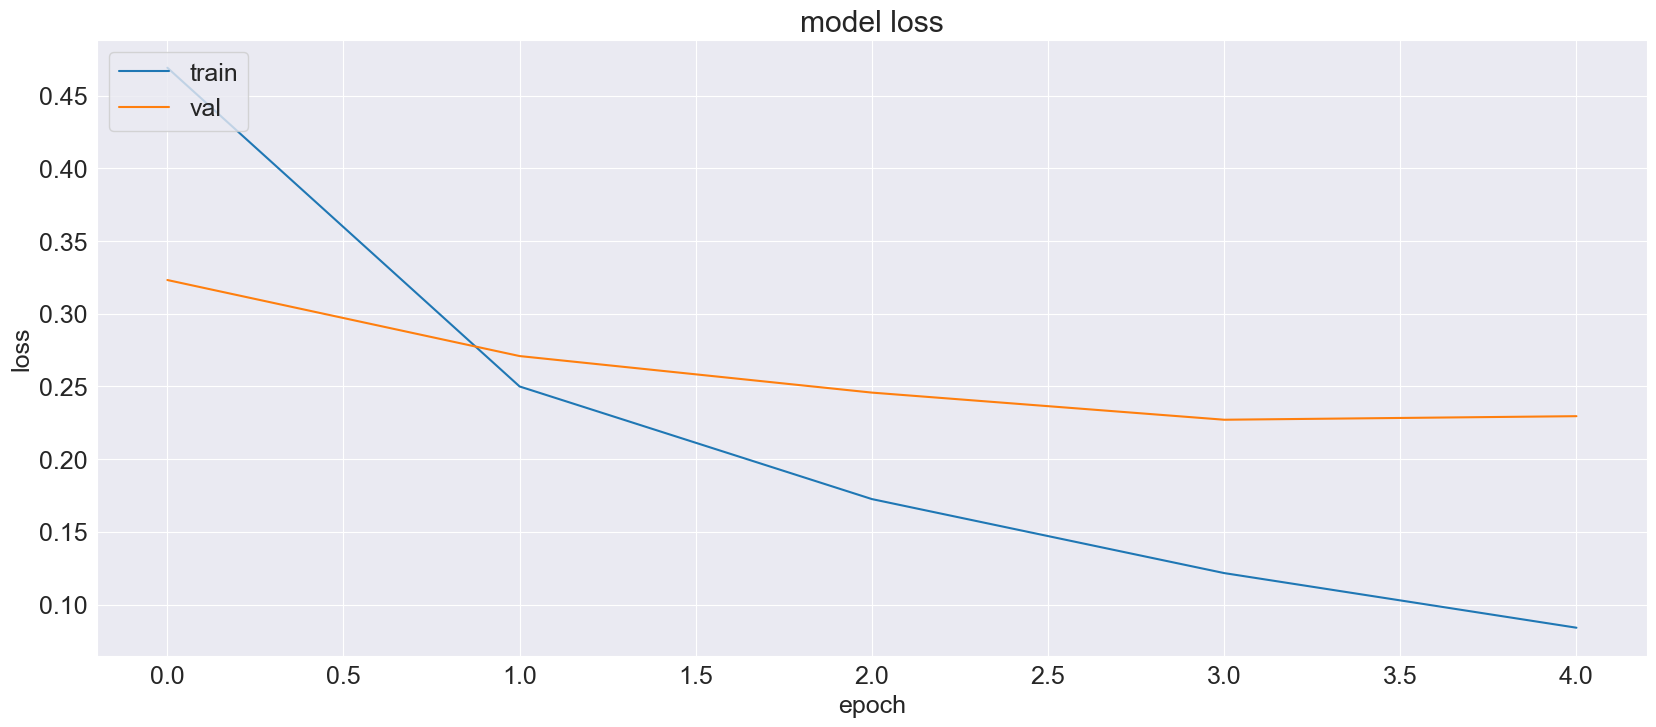

In [38]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

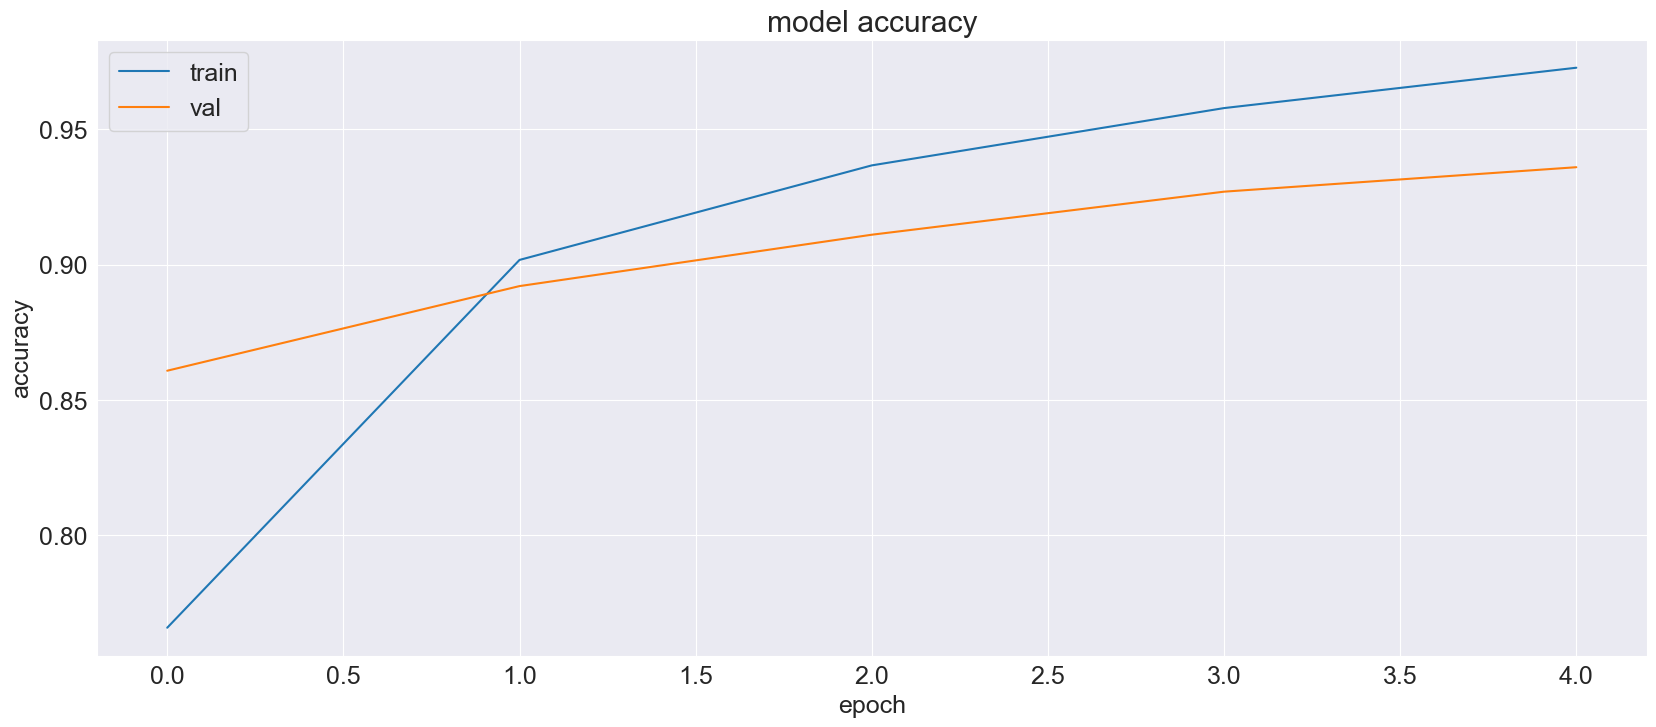

In [39]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### Inference: In case of overfitting use the traditional methods

###### Low learning rate
##### L1-L2 Regularization
##### Dropout
##### Lesser Neurons in MLP layers
##### Early Stopping
etc.

##### Classification Metrics
Since it is important to not misclassify the genuine headlines as sarcastic headlines we will also look at the roc auc score to avoid misclassification of genuine headlines as sarcastic headlines

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, PrecisionRecallDisplay


#### ROC Curve

173/173 [==============================] - 1s 2ms/step


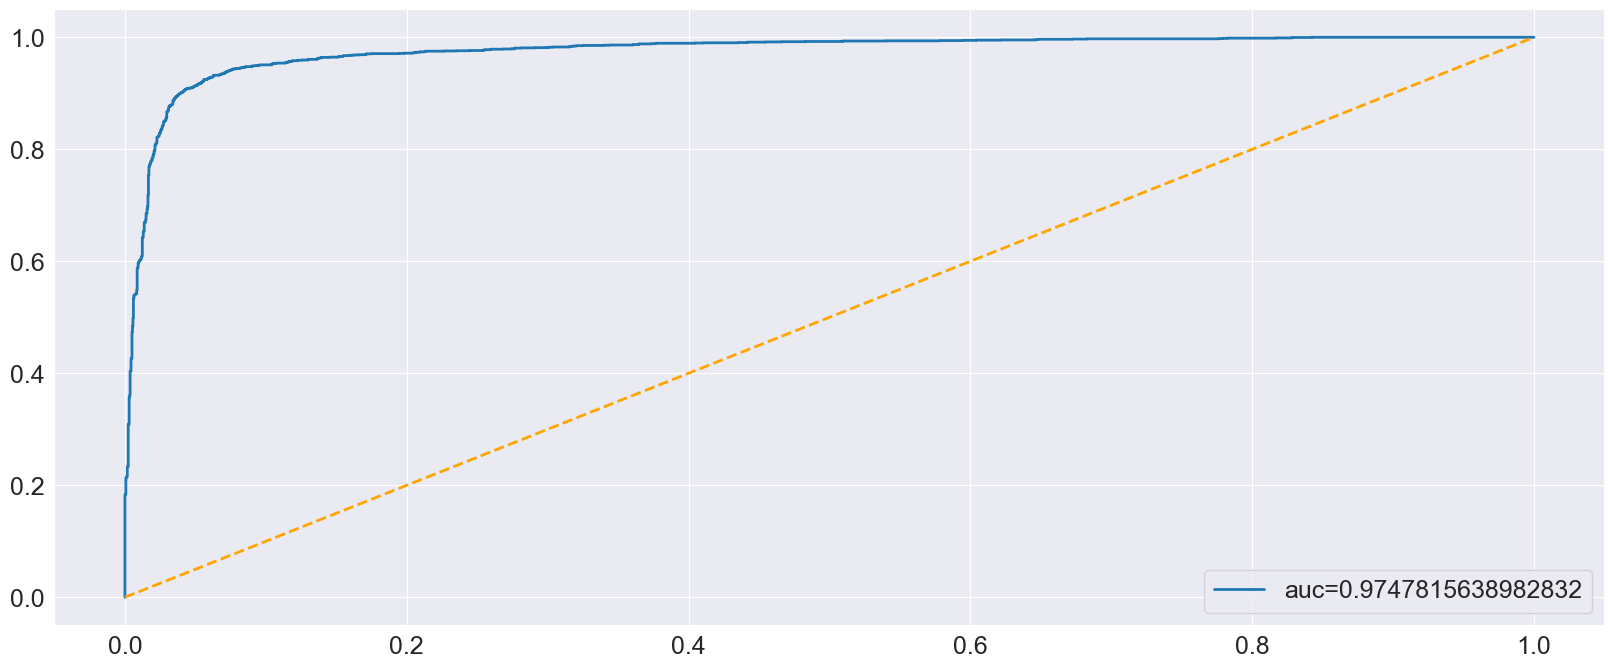

In [41]:
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

##### Scores: Test Set Result

In [42]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2997
           1       0.96      0.88      0.92      2536

    accuracy                           0.93      5533
   macro avg       0.93      0.92      0.93      5533
weighted avg       0.93      0.93      0.93      5533



#### CONFUSION MATRIX

<Axes: >

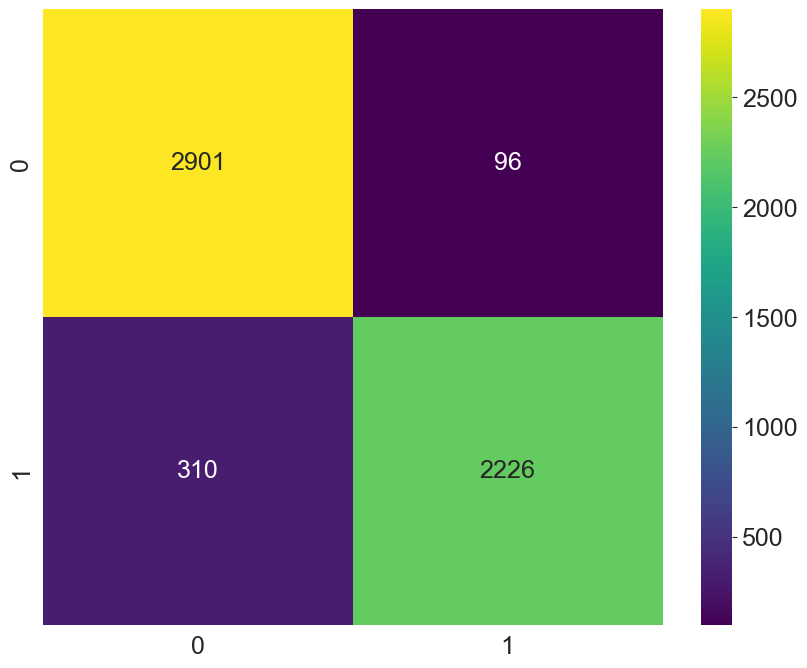

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g',cmap='viridis')

### RNN with GRU

In [48]:
train_data, test_data = train_test_split(data[['headline', 'is_sarcastic']], test_size=0.1)  # randomly splitting 10% of dataset to be training dataset 

training_sentences = list(train_data['headline'])
training_labels = list(train_data['is_sarcastic'])

testing_sentences = list(test_data['headline'])
testing_labels = list(test_data['is_sarcastic'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [49]:
vocab_size = 10000   # limit vector of words to the top 10,000 words
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# no lemmatization, removal of stop words and stemming of headlines as we would like to maintain the syntax, literature integrity, sequence of words in LSTM.

In [50]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [51]:
 #Model Definition with BiRNN (GRU)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [52]:
num_epochs = 10
history_1 = model_1.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
779/779 [==============================] - 25s 29ms/step - loss: 0.5599 - accuracy: 0.8368 - val_loss: 0.2912 - val_accuracy: 0.8943
Epoch 2/10
779/779 [==============================] - 21s 27ms/step - loss: 0.2090 - accuracy: 0.9341 - val_loss: 0.2390 - val_accuracy: 0.9214
Epoch 3/10
779/779 [==============================] - 21s 27ms/step - loss: 0.1390 - accuracy: 0.9621 - val_loss: 0.1856 - val_accuracy: 0.9490
Epoch 4/10
779/779 [==============================] - 22s 28ms/step - loss: 0.0978 - accuracy: 0.9780 - val_loss: 0.1623 - val_accuracy: 0.9592
Epoch 5/10
779/779 [==============================] - 22s 28ms/step - loss: 0.0739 - accuracy: 0.9859 - val_loss: 0.1531 - val_accuracy: 0.9682
Epoch 6/10
779/779 [==============================] - 22s 28ms/step - loss: 0.0577 - accuracy: 0.9904 - val_loss: 0.1375 - val_accuracy: 0.9680
Epoch 7/10
779/779 [==============================] - 22s 28ms/step - loss: 0.0506 - accuracy: 0.9929 - val_loss: 0.1181 - val_accuracy:

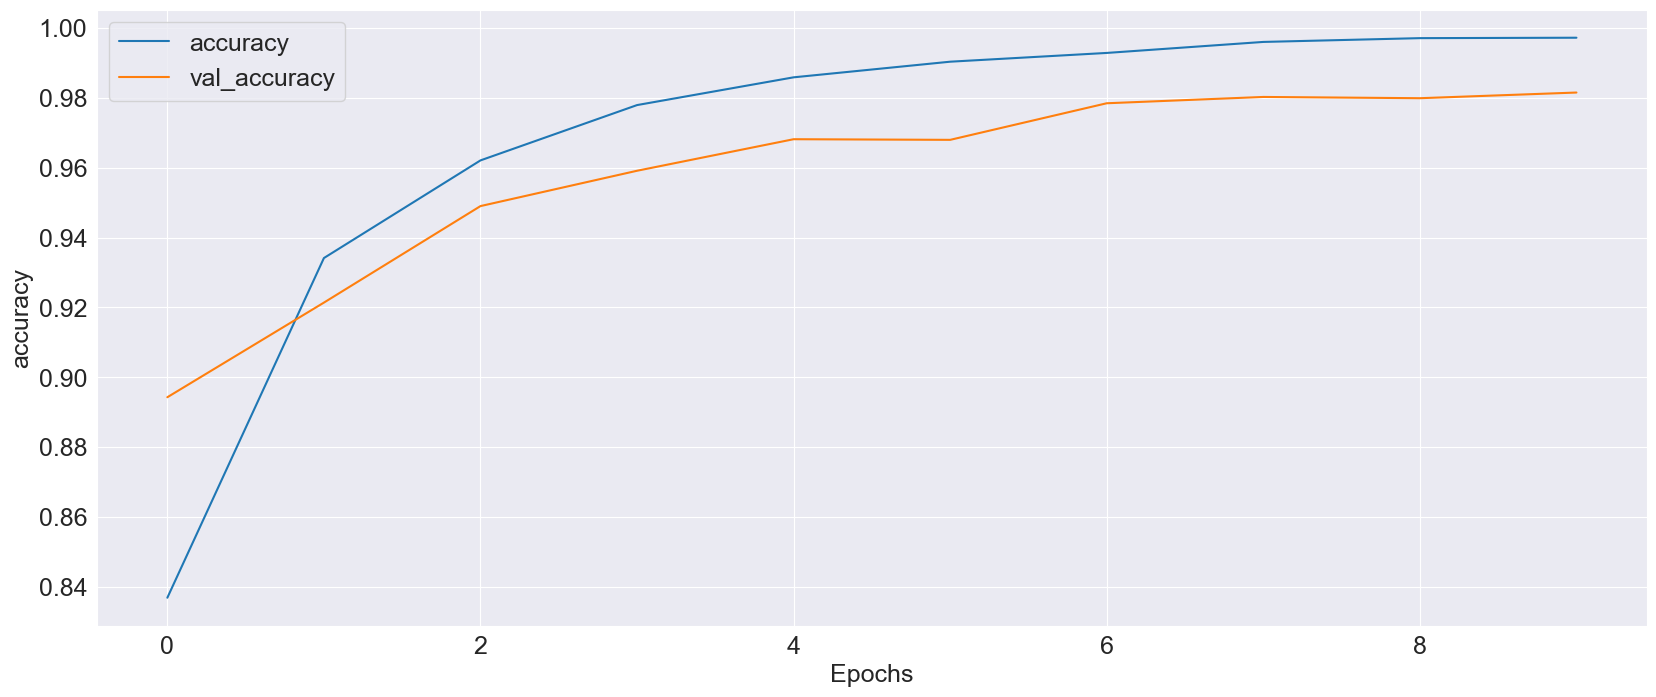

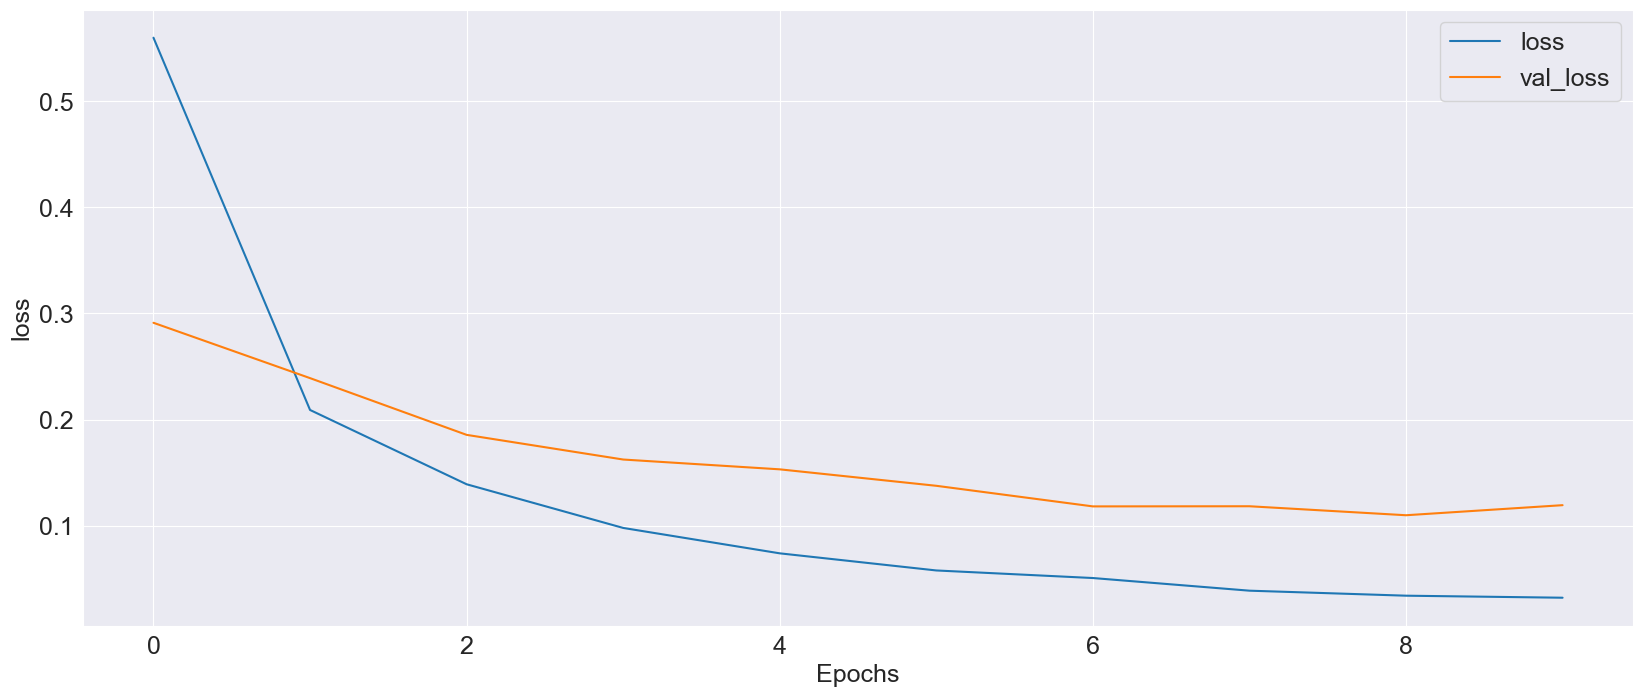

In [53]:
import matplotlib.pyplot as plt


def plot_graphs(history_1, string):
    plt.plot(history_1.history[string])
    plt.plot(history_1.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_1, 'accuracy')
plot_graphs(history_1, 'loss')
plt.show()

In [55]:
y_pred = model_1.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

ValueError: in user code:

    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 120), found shape=(None, 20)


In [ ]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0

print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g',cmap='viridis')

In [31]:
# Model Definition with BiRNN (GRU)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [32]:
num_epochs = 10
history_2 = model_2.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 14s 30ms/step - loss: 0.5175 - accuracy: 0.7829 - val_loss: 0.5557 - val_accuracy: 0.7200
Epoch 2/10
376/376 [==============================] - 11s 28ms/step - loss: 0.2683 - accuracy: 0.8987 - val_loss: 0.5627 - val_accuracy: 0.7465
Epoch 3/10
376/376 [==============================] - 11s 29ms/step - loss: 0.1736 - accuracy: 0.9389 - val_loss: 0.6609 - val_accuracy: 0.7694
Epoch 4/10
376/376 [==============================] - 11s 28ms/step - loss: 0.1309 - accuracy: 0.9545 - val_loss: 0.4897 - val_accuracy: 0.8308
Epoch 5/10
376/376 [==============================] - 11s 30ms/step - loss: 0.0926 - accuracy: 0.9703 - val_loss: 0.5476 - val_accuracy: 0.8267
Epoch 6/10
376/376 [==============================] - 11s 30ms/step - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.6869 - val_accuracy: 0.8139
Epoch 7/10
376/376 [==============================] - 11s 29ms/step - loss: 0.0553 - accuracy: 0.9847 - val_loss: 0.6873 - val_accuracy:

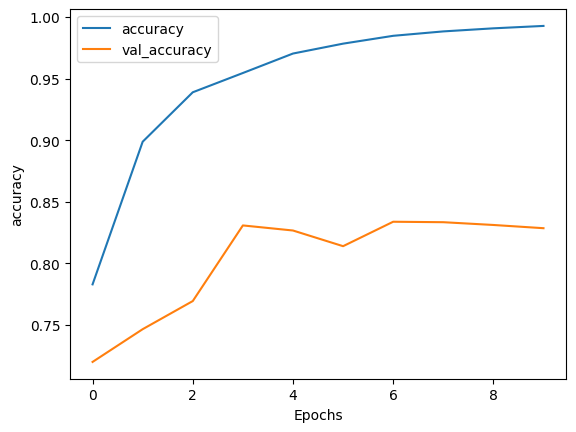

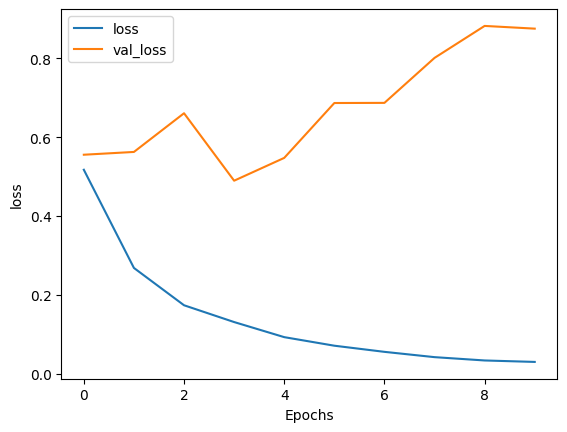

In [33]:
plot_graphs(history_2, 'accuracy')
plot_graphs(history_2, 'loss')
plt.show()

RNN with LSTM Architecture
For the prediction of sarcasm of headlines, we will use RNN with the following architectures:

RNN with Long Short Term Memory Units (with Lasso Regularization, Dropout, Batch Normalization)
RNN with Long Short Term Memory Units (with Ridge Regularization, Dropout, Batch Normalization)

In [34]:
# Model Definition with BiRNN (LSTM)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [35]:
num_epochs = 10
history_3 = model_3.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 14s 30ms/step - loss: 0.8057 - accuracy: 0.7993 - val_loss: 0.5289 - val_accuracy: 0.8566
Epoch 2/10
376/376 [==============================] - 10s 26ms/step - loss: 0.2879 - accuracy: 0.8995 - val_loss: 0.3788 - val_accuracy: 0.8431
Epoch 3/10
376/376 [==============================] - 10s 27ms/step - loss: 0.2092 - accuracy: 0.9341 - val_loss: 0.4072 - val_accuracy: 0.8521
Epoch 4/10
376/376 [==============================] - 11s 28ms/step - loss: 0.1578 - accuracy: 0.9556 - val_loss: 0.4640 - val_accuracy: 0.8514
Epoch 5/10
376/376 [==============================] - 11s 30ms/step - loss: 0.1209 - accuracy: 0.9700 - val_loss: 0.5262 - val_accuracy: 0.8428
Epoch 6/10
376/376 [==============================] - 11s 30ms/step - loss: 0.0940 - accuracy: 0.9787 - val_loss: 0.6035 - val_accuracy: 0.8356
Epoch 7/10
376/376 [==============================] - 10s 28ms/step - loss: 0.0749 - accuracy: 0.9858 - val_loss: 0.7135 - val_accuracy:

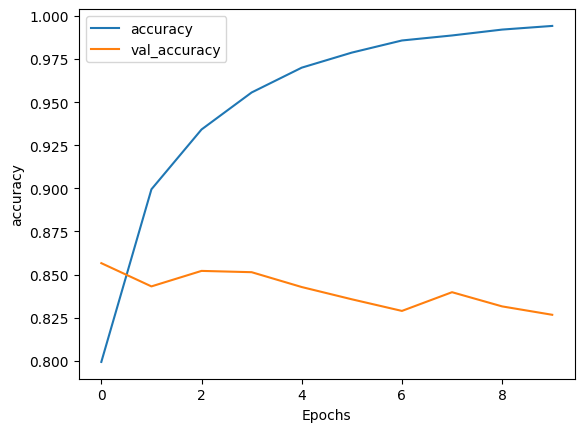

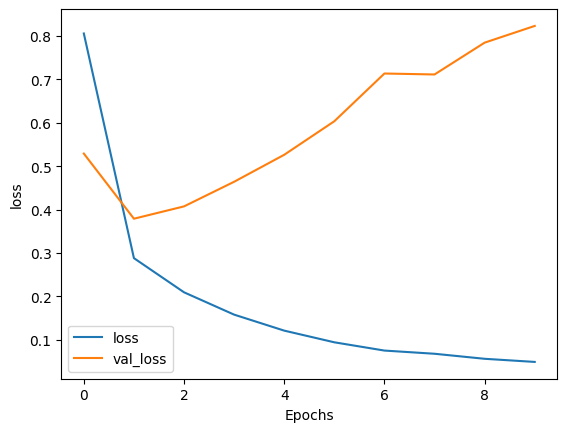

In [36]:
plot_graphs(history_3, 'accuracy')
plot_graphs(history_3, 'loss')
plt.show()

In [37]:
# Model Definition with BiRNN (LSTM)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [38]:
num_epochs = 10
history_4 = model_4.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 13s 28ms/step - loss: 0.4919 - accuracy: 0.7977 - val_loss: 0.5098 - val_accuracy: 0.8405
Epoch 2/10
376/376 [==============================] - 10s 26ms/step - loss: 0.2567 - accuracy: 0.9007 - val_loss: 0.3556 - val_accuracy: 0.8529
Epoch 3/10
376/376 [==============================] - 10s 26ms/step - loss: 0.1746 - accuracy: 0.9392 - val_loss: 0.3806 - val_accuracy: 0.8458
Epoch 4/10
376/376 [==============================] - 10s 26ms/step - loss: 0.1242 - accuracy: 0.9582 - val_loss: 0.4809 - val_accuracy: 0.8424
Epoch 5/10
376/376 [==============================] - 10s 26ms/step - loss: 0.0940 - accuracy: 0.9682 - val_loss: 0.5737 - val_accuracy: 0.8274
Epoch 6/10
376/376 [==============================] - 10s 26ms/step - loss: 0.0724 - accuracy: 0.9782 - val_loss: 0.6731 - val_accuracy: 0.8158
Epoch 7/10
376/376 [==============================] - 10s 27ms/step - loss: 0.0619 - accuracy: 0.9817 - val_loss: 0.6906 - val_accuracy:

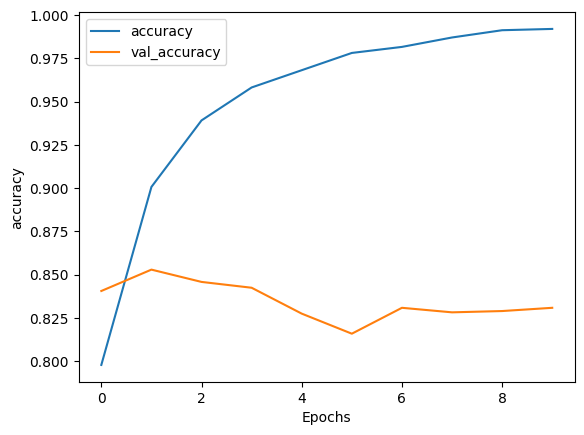

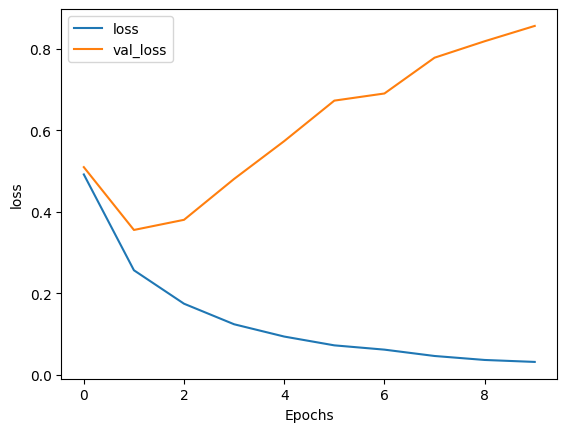

In [39]:
plot_graphs(history_4, 'accuracy')
plot_graphs(history_4, 'loss')
plt.show()

In [40]:
# Model Definition with CNN (Conv1D)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_8 (Dense)             (None, 100)               12900     
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 100)              

In [41]:
num_epochs = 10
history_5 = model_5.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 4s 9ms/step - loss: 0.9898 - accuracy: 0.7776 - val_loss: 0.9582 - val_accuracy: 0.5567
Epoch 2/10
376/376 [==============================] - 3s 8ms/step - loss: 0.3324 - accuracy: 0.8918 - val_loss: 0.4476 - val_accuracy: 0.8240
Epoch 3/10
376/376 [==============================] - 3s 8ms/step - loss: 0.2706 - accuracy: 0.9147 - val_loss: 1.4592 - val_accuracy: 0.6342
Epoch 4/10
376/376 [==============================] - 4s 10ms/step - loss: 0.2377 - accuracy: 0.9291 - val_loss: 0.4256 - val_accuracy: 0.8469
Epoch 5/10
376/376 [==============================] - 4s 10ms/step - loss: 0.2165 - accuracy: 0.9398 - val_loss: 4.6320 - val_accuracy: 0.5620
Epoch 6/10
376/376 [==============================] - 3s 8ms/step - loss: 0.2081 - accuracy: 0.9414 - val_loss: 2.7604 - val_accuracy: 0.4811
Epoch 7/10
376/376 [==============================] - 3s 8ms/step - loss: 0.1841 - accuracy: 0.9480 - val_loss: 7.8127 - val_accuracy: 0.4433
Epoc

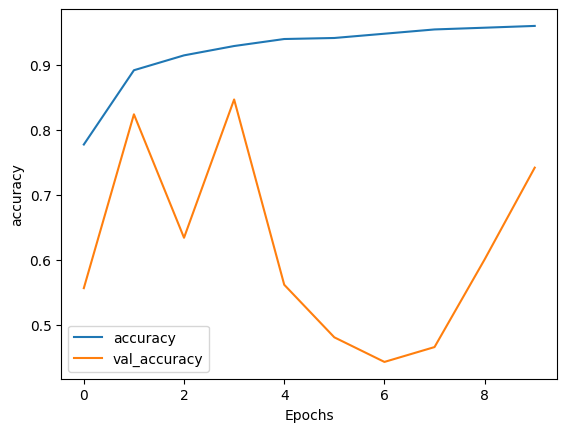

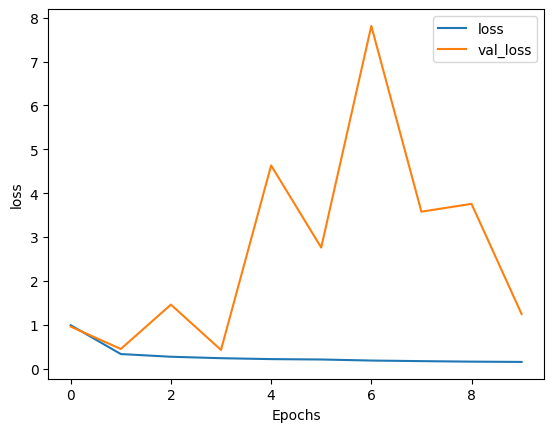

In [42]:
plot_graphs(history_5, 'accuracy')
plot_graphs(history_5, 'loss')
plt.show()

CNN
For the prediction of sarcasm of headlines, we will use CNN with the following architectures:

CNN with Conv1D

In [43]:
# Model Definition with CNN (Conv1D)
# with L2 Ridge Regularization
# Dropout, for robustness
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 100)               12900     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                      

In [44]:
num_epochs = 10
history_6 = model_6.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 4s 9ms/step - loss: 0.6655 - accuracy: 0.6456 - val_loss: 0.4561 - val_accuracy: 0.8139
Epoch 2/10
376/376 [==============================] - 3s 8ms/step - loss: 0.3722 - accuracy: 0.8615 - val_loss: 0.3876 - val_accuracy: 0.8491
Epoch 3/10
376/376 [==============================] - 3s 8ms/step - loss: 0.2949 - accuracy: 0.9024 - val_loss: 0.3816 - val_accuracy: 0.8540
Epoch 4/10
376/376 [==============================] - 3s 8ms/step - loss: 0.2552 - accuracy: 0.9215 - val_loss: 0.3919 - val_accuracy: 0.8517
Epoch 5/10
376/376 [==============================] - 3s 9ms/step - loss: 0.2259 - accuracy: 0.9338 - val_loss: 0.4071 - val_accuracy: 0.8484
Epoch 6/10
376/376 [==============================] - 3s 8ms/step - loss: 0.2036 - accuracy: 0.9428 - val_loss: 0.4270 - val_accuracy: 0.8465
Epoch 7/10
376/376 [==============================] - 3s 8ms/step - loss: 0.1860 - accuracy: 0.9505 - val_loss: 0.4686 - val_accuracy: 0.8454
Epoch 

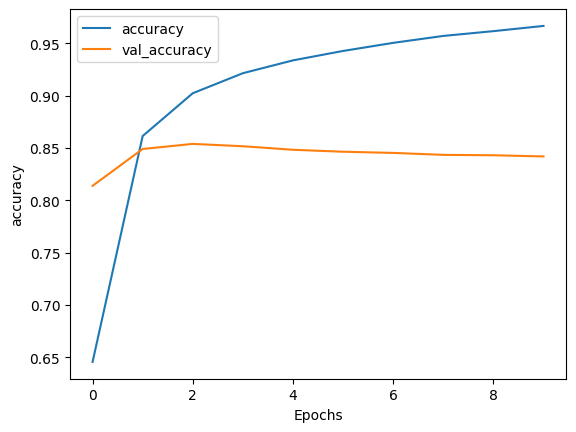

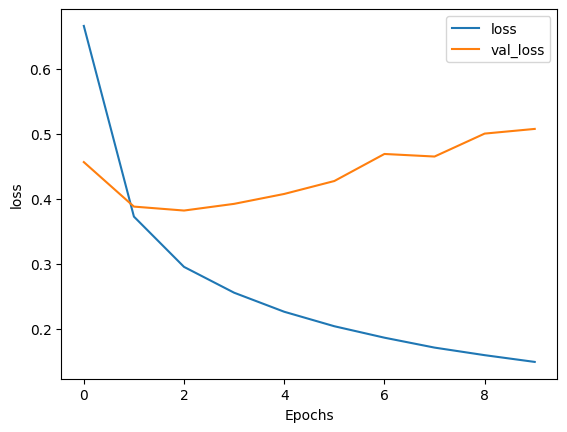

In [45]:
plot_graphs(history_6, 'accuracy')
plot_graphs(history_6, 'loss')
plt.show()

CNN-RNN combined architecture
For the prediction of sarcasm of headlines, we will use the following architecture:

Combination of CNN-RNN (LSTM)
Output from CNN with Conv1D is used as input for RNN with LSTM (with Lasso Regularization, Dropout)

In [46]:
# Model Definition with CNN (Conv1D)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 1, activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding="same"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.005), activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.005), activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 120, 128)          2176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 128)          0         
 )                                                               
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 100)               6500      
                                                                 
 dropout_6 (Dropout)         (None, 100)              

In [47]:
num_epochs = 10
history_7 = model_7.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 16s 34ms/step - loss: 1.1906 - accuracy: 0.6529 - val_loss: 0.4920 - val_accuracy: 0.8349
Epoch 2/10
376/376 [==============================] - 12s 32ms/step - loss: 0.4422 - accuracy: 0.8732 - val_loss: 0.4376 - val_accuracy: 0.8487
Epoch 3/10
376/376 [==============================] - 11s 30ms/step - loss: 0.3553 - accuracy: 0.9158 - val_loss: 0.4568 - val_accuracy: 0.8428
Epoch 4/10
376/376 [==============================] - 12s 32ms/step - loss: 0.3096 - accuracy: 0.9351 - val_loss: 0.4776 - val_accuracy: 0.8469
Epoch 5/10
376/376 [==============================] - 13s 34ms/step - loss: 0.2795 - accuracy: 0.9485 - val_loss: 0.4803 - val_accuracy: 0.8413
Epoch 6/10
376/376 [==============================] - 15s 40ms/step - loss: 0.2573 - accuracy: 0.9566 - val_loss: 0.5106 - val_accuracy: 0.8472
Epoch 7/10
376/376 [==============================] - 13s 34ms/step - loss: 0.2329 - accuracy: 0.9643 - val_loss: 0.5496 - val_accuracy:

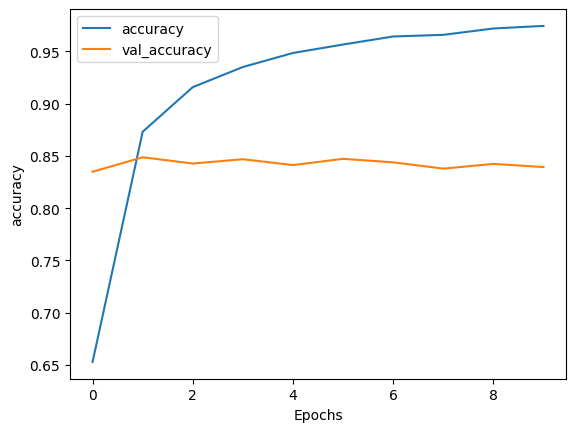

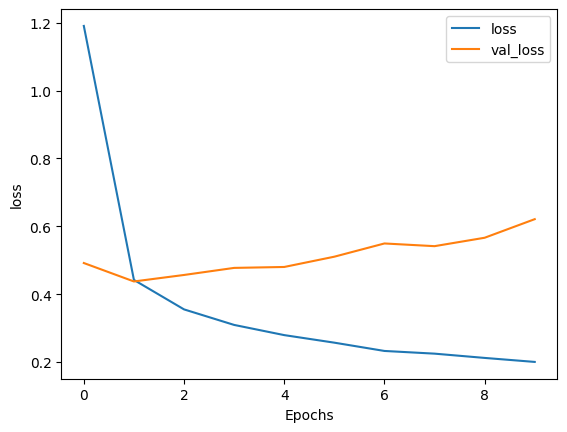

In [48]:
plot_graphs(history_7, 'accuracy')
plot_graphs(history_7, 'loss')
plt.show()

In [50]:
#plotting comparison between 4 models
import pandas as pd
from pandas import DataFrame
accuracy = [max(history_1.history['val_accuracy']),max(history_2.history['val_accuracy']), max(history_3.history['val_accuracy']),max(history_4.history['val_accuracy']),max(history_5.history['val_accuracy']),max(history_6.history['val_accuracy']),max(history_7.history['val_accuracy'])]
loss = [max(history_1.history['val_loss']),max(history_2.history['val_loss']),max(history_3.history['val_loss']),max(history_4.history['val_loss']),max(history_5.history['val_loss']),max(history_6.history['val_loss']),max(history_7.history['val_loss'])]

col={'Accuracy':accuracy,'Loss':loss}
models=['model_1','model_2','model_3','model_4','model_5','model_6','model_7']
graph_df=DataFrame(data=col,index=models)
graph_df

Accuracy      Loss
model_1  0.852490  0.734987
model_2  0.833770  0.882617
model_3  0.856608  0.823196
model_4  0.852864  0.856425
model_5  0.846874  7.812666
model_6  0.853987  0.507089
model_7  0.848746  0.621208

<Axes: >

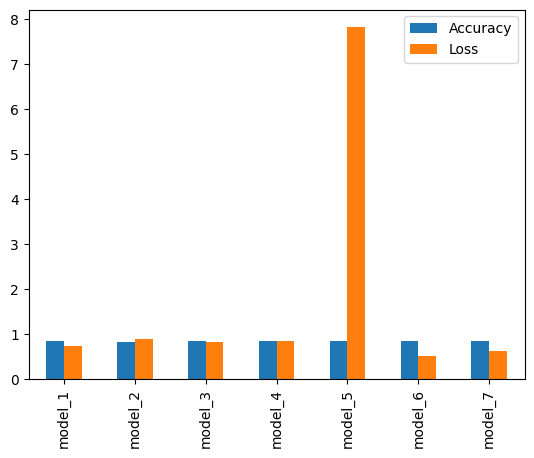

In [51]:
graph_df.plot(kind='bar')